# Binary Classification of Machine Failures
The Playground series on Kaggle, designed to offer low-computational machine learning and data science challenges that allow the community to practice and improve skills in modeling, feature engineering, and data visualization.

The dataset for this competition was generated using a deep learning model trained on machine failure predictions. The feature distributions are similar, but not identical, to the original. Participants can explore differences between the original and synthetic datasets to analyze how these changes affect the model's performance.

Files:

- train.csv: Training data with "Machine failure" as the binary target variable.
- test.csv: Test data; the goal is to predict the probability of machine failure.
- sample_submission.csv: Sample submission file in the correct format.

## 1- Statistical analysis

In [3]:
# Importar las librerías necesarias
import pandas as pd

# Cargar el archivo de entrenamiento
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Mostrar una vista previa de los datos
train_data.head()


id Product ID Type  Air temperature [K]  ...  HDF  PWF  OSF  RNF
0   0     L50096    L                300.6  ...    0    0    0    0
1   1     M20343    M                302.6  ...    0    0    0    0
2   2     L49454    L                299.3  ...    0    0    0    0
3   3     L53355    L                301.0  ...    0    0    0    0
4   4     M24050    M                298.0  ...    0    0    0    0

[5 rows x 14 columns]

In [4]:
train_data.describe()

id  Air temperature [K]  ...            OSF            RNF
count  136429.000000        136429.000000  ...  136429.000000  136429.000000
mean    68214.000000           299.862776  ...       0.003958       0.002258
std     39383.804275             1.862247  ...       0.062789       0.047461
min         0.000000           295.300000  ...       0.000000       0.000000
25%     34107.000000           298.300000  ...       0.000000       0.000000
50%     68214.000000           300.000000  ...       0.000000       0.000000
75%    102321.000000           301.200000  ...       0.000000       0.000000
max    136428.000000           304.400000  ...       1.000000       1.000000

[8 rows x 12 columns]

In [5]:
test_data.describe()

id  Air temperature [K]  ...          OSF           RNF
count   90954.000000         90954.000000  ...  90954.00000  90954.000000
mean   181905.500000           299.859493  ...      0.00387      0.002309
std     26256.302529             1.857562  ...      0.06209      0.047995
min    136429.000000           295.300000  ...      0.00000      0.000000
25%    159167.250000           298.300000  ...      0.00000      0.000000
50%    181905.500000           300.000000  ...      0.00000      0.000000
75%    204643.750000           301.200000  ...      0.00000      0.000000
max    227382.000000           304.400000  ...      1.00000      1.000000

[8 rows x 11 columns]

The statistics revealed in the training set and in the test set show quite a few similarities, which in principle is good when it comes to modeling.

In [6]:
train_data.isnull().any() # No hay nulos

id                         False
Product ID                 False
Type                       False
Air temperature [K]        False
Process temperature [K]    False
Rotational speed [rpm]     False
Torque [Nm]                False
Tool wear [min]            False
Machine failure            False
TWF                        False
HDF                        False
PWF                        False
OSF                        False
RNF                        False
dtype: bool

C:\Users\soler\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


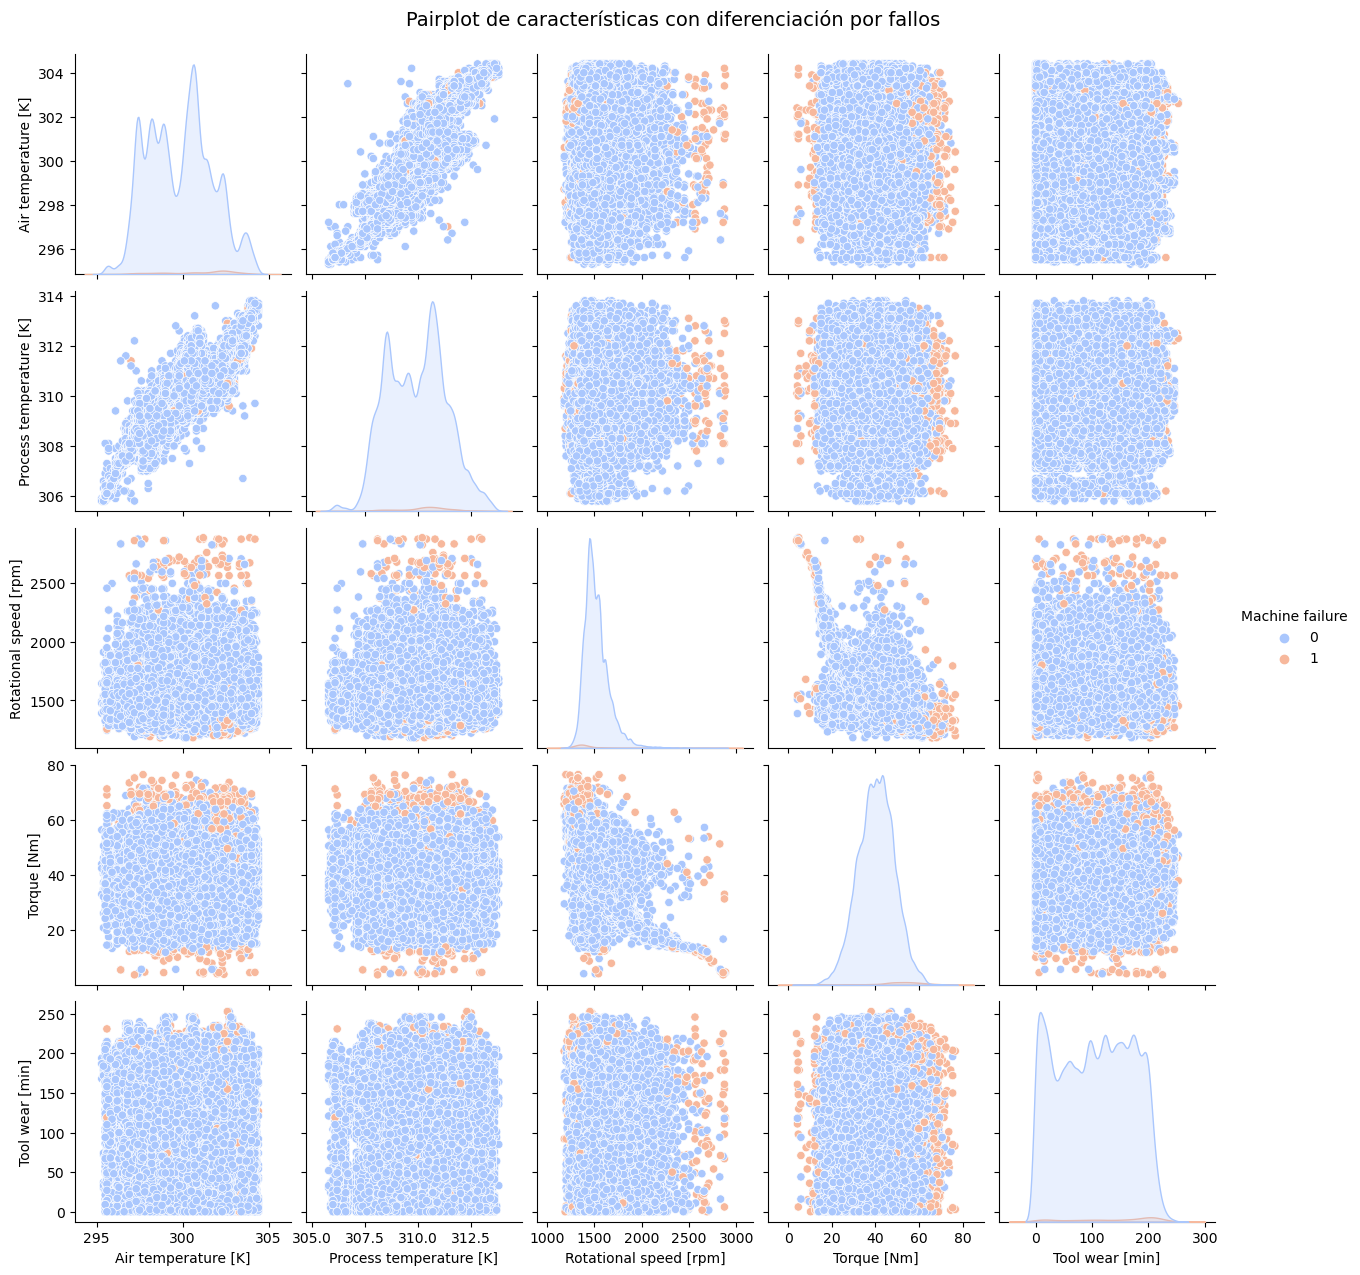

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas relevantes para la representación de pares
pairplot_columns = ['Air temperature [K]', 'Process temperature [K]', 
                    'Rotational speed [rpm]', 'Torque [Nm]', 
                    'Tool wear [min]', 'Machine failure']

# Crear un gráfico de pares (pairplot) diferenciando por fallos y no fallos
sns.pairplot(train_data[pairplot_columns], hue='Machine failure', palette='coolwarm', diag_kind="kde")

# Mostrar el gráfico
plt.suptitle("Pairplot de características con diferenciación por fallos", y=1.02, fontsize=14)
plt.show()

Thanks to this representation, it can be observed that there are areas where there is a tendency for more errors to accumulate. Therefore, this will be of great help when the classifier differentiates an error from a non-error.

C:\Users\soler\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\soler\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\soler\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\soler\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\soler\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\soler\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because n

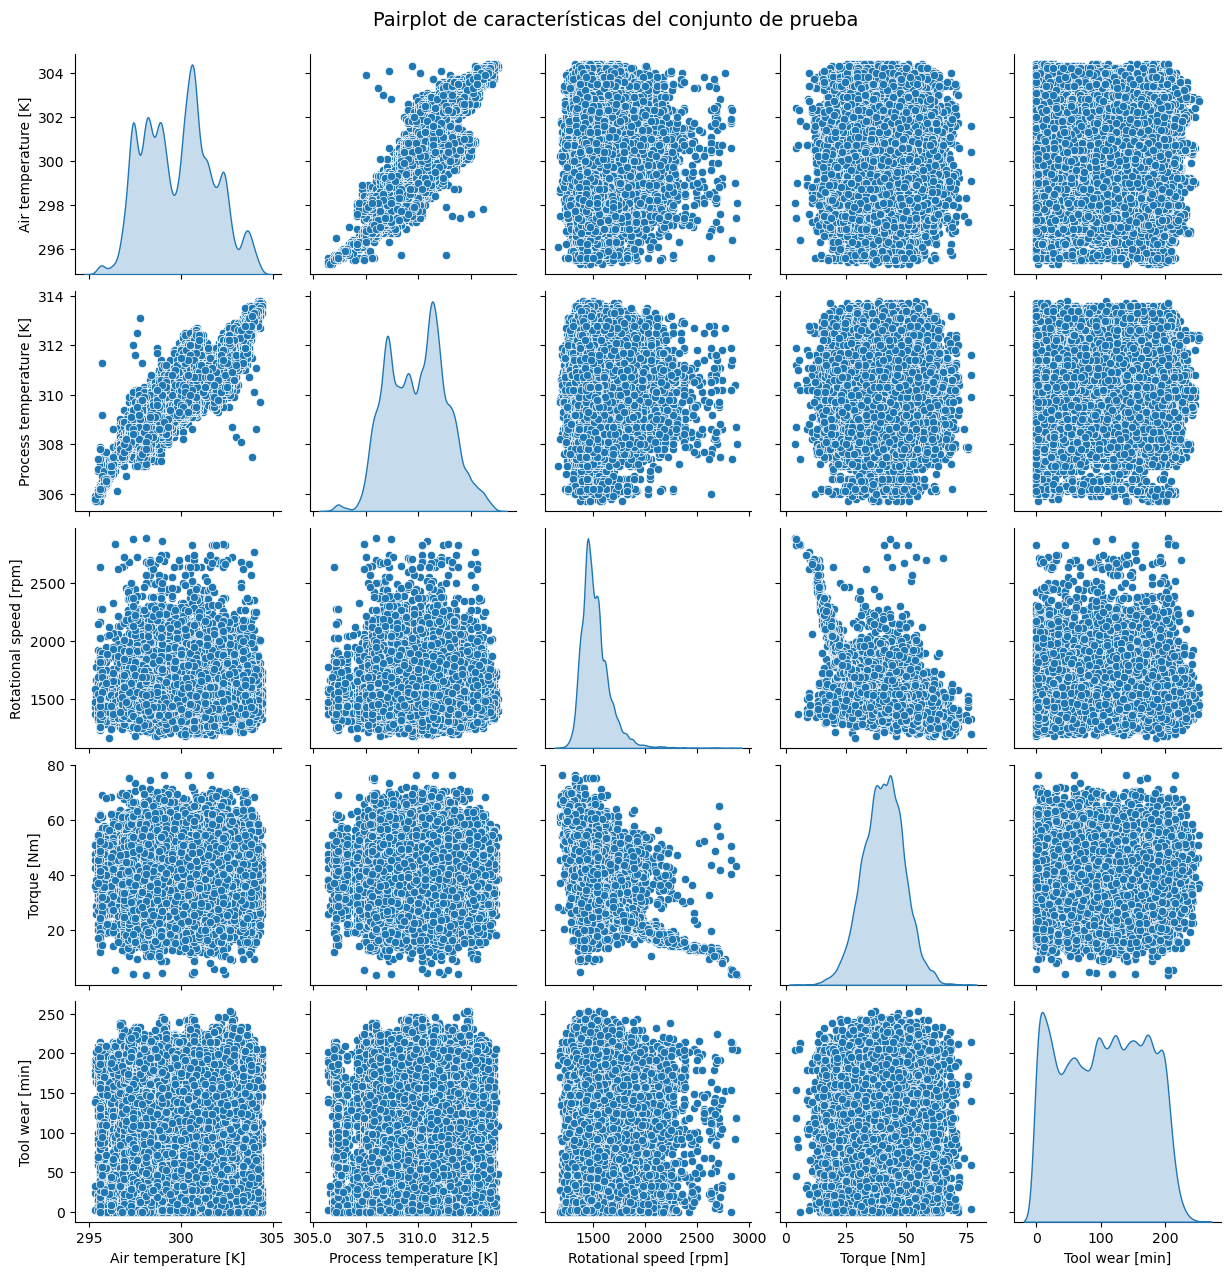

In [8]:
# Seleccionar las columnas relevantes para la representación de pares
pairplot_columns = ['Air temperature [K]', 'Process temperature [K]', 
                    'Rotational speed [rpm]', 'Torque [Nm]', 
                    'Tool wear [min]']

# Crear un gráfico de pares (pairplot) diferenciando por fallos y no fallos
sns.pairplot(test_data[pairplot_columns], palette='coolwarm', diag_kind="kde")

# Mostrar el gráfico
plt.suptitle("Pairplot de características del conjunto de prueba", y=1.02, fontsize=14)
plt.show()

We see that both the distributions and the pair plot representations have a very similar structure, just as we had intuited in the descriptive statistics section.

In [9]:
# Calculation of the percentage of failures
total_instances = train_data['id'].count()
number_failures = train_data['Machine failure'].sum()

print('Percentage of failures:', number_failures/total_instances*100, '%')

Percentage of failures: 1.574445315878589 %


We see that the percentage of failures is very low compared to the good functioning of the machine. In principle we will model respecting this tendency, but if necessary we will deal with this imbalance later.

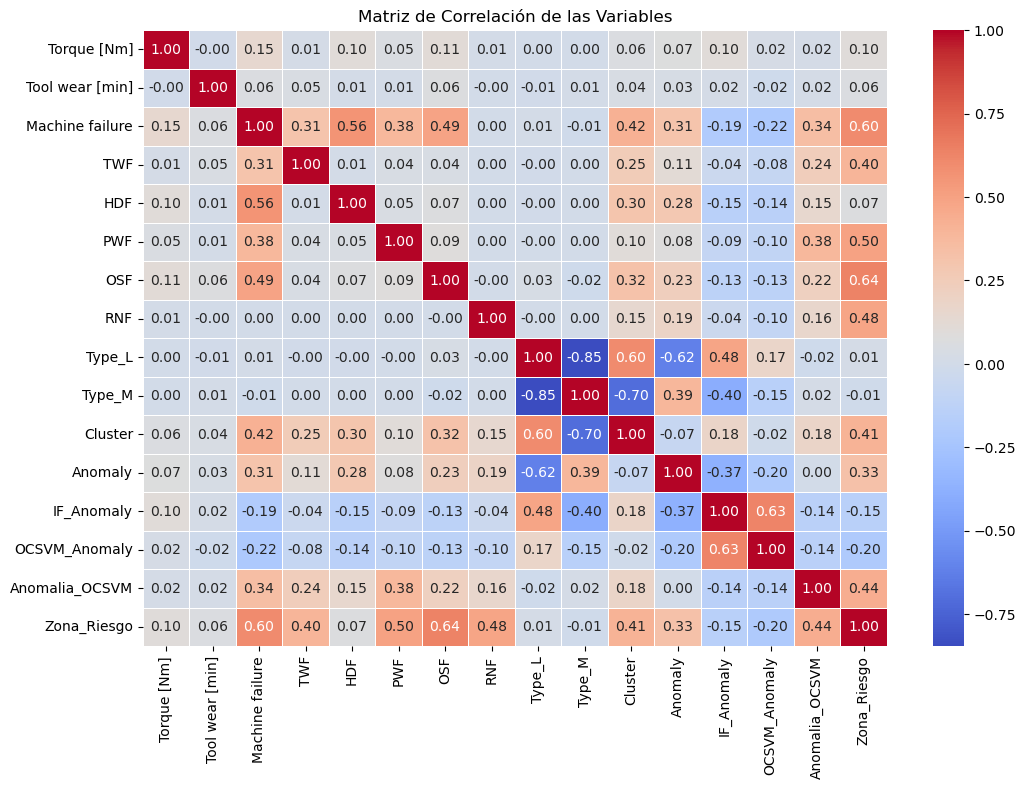

In [111]:
# Calcular la matriz de correlación
correlation_matrix = train_data.iloc[:,3:].corr()

# Crear un heatmap con seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación de las Variables")
plt.show()

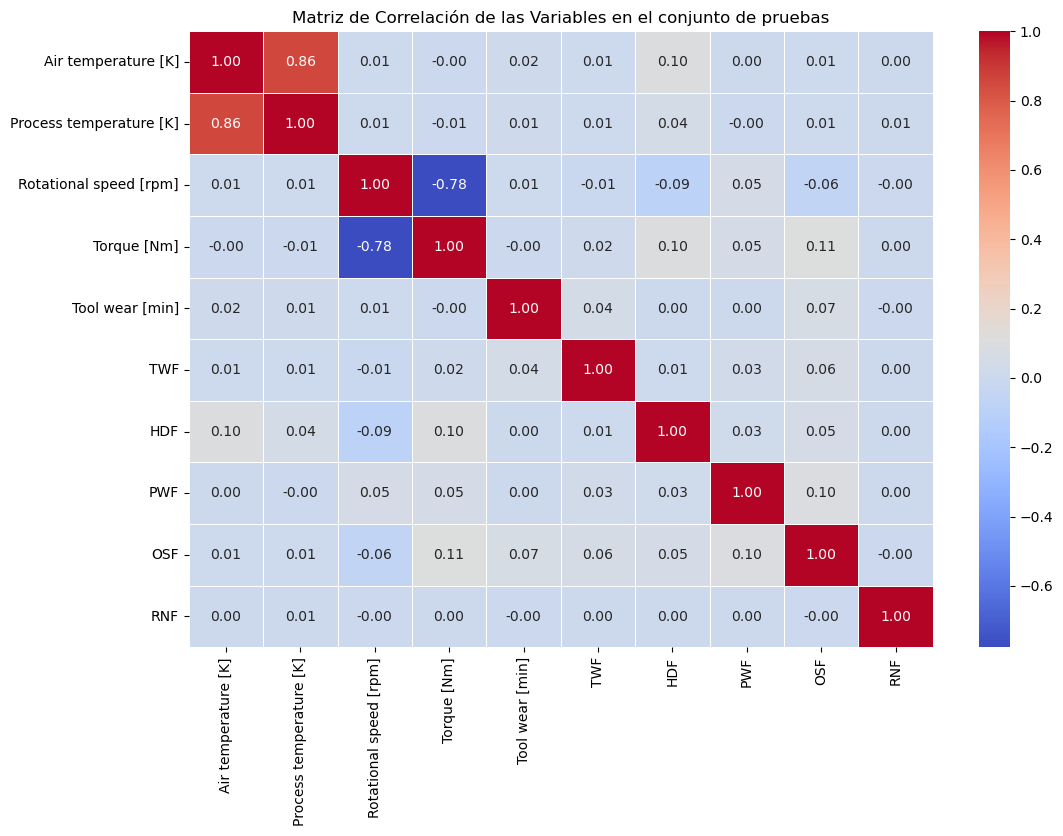

In [11]:
# Calcular la matriz de correlación
correlation_matrix = test_data.iloc[:,3:].corr()

# Crear un heatmap con seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación de las Variables en el conjunto de pruebas")
plt.show()

In the correlation matrix we also see similar behaviors between the training set and the test set.

## 2- Data Visualization

In the Data Visualization section, various advanced dimensionality reduction and anomaly detection techniques will be used to analyze the dataset and explore underlying patterns. Dimension reduction using PCA (Principal Component Analysis) and t-SNE (T-distributed Stochastic Neighbor Embedding) will allow the data to be projected into two-dimensional spaces, thus facilitating its visualization and the identification of possible clusters or structures inherent to the characteristics.

To detect possible anomalies and compare them with known faults, methods such as DBSCAN (Density-Based Spatial Clustering of Applications with Noise), Isolation Forest and One-Class SVM will be used. These techniques will allow the identification of atypical observations in the dataset that could correspond to faults in the system. By comparing the detected anomalies with the fault records, we will seek to better understand the characteristics of the faults and evaluate the effectiveness of each detection method in this context.

In [15]:
# Eliminar las columnas 'id' y 'Product ID'
train_data = train_data.drop(['id', 'Product ID'], axis=1)
test_data = test_data.drop(['id', 'Product ID'], axis=1)

# Crear variables dummy para la columna 'Type'
train_data = pd.get_dummies(train_data, columns=['Type'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Type'], drop_first=True)

# Verificar las primeras filas para confirmar los cambios
train_data.head()


KeyError: "['id', 'Product ID'] not found in axis"

In [16]:
test_data = pd.get_dummies(test_data, columns=['Type'], drop_first=True)

### 2.1- PCA (Principal Component Analysis)
In the PCA (Principal Component Analysis) subsection, this dimensionality reduction technique will be implemented to transform the data set into a lower-dimensional space, maintaining the highest possible variance of the original features. By reducing the number of dimensions, PCA allows the visualization of underlying patterns and clusters in the data in a more simplified and manageable way. This technique will be very useful to identify relationships between features and explore the general structure of the data set in a two-dimensional space, thus facilitating the detection of trends and possible areas of fault concentration.

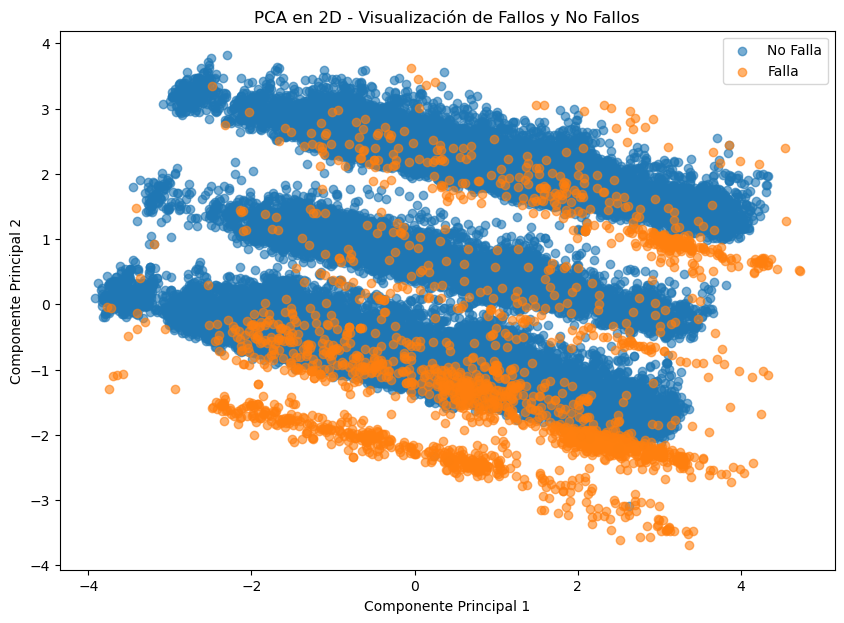

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separar la columna 'Machine failure'
machine_failure = train_data['Machine failure']
features = train_data.drop(['Machine failure'], axis=1)

# Estandarizar las características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Crear un DataFrame con los resultados del PCA
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Machine failure'] = machine_failure.values

# Visualizar los resultados con diferentes colores para fallos y no fallos
plt.figure(figsize=(10, 7))
for failure_status in [0, 1]:
    subset = pca_df[pca_df['Machine failure'] == failure_status]
    plt.scatter(subset['PCA1'], subset['PCA2'], 
                label=f'{"No Falla" if failure_status == 0 else "Falla"}', alpha=0.6)

plt.title("PCA en 2D - Visualización de Fallos y No Fallos")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

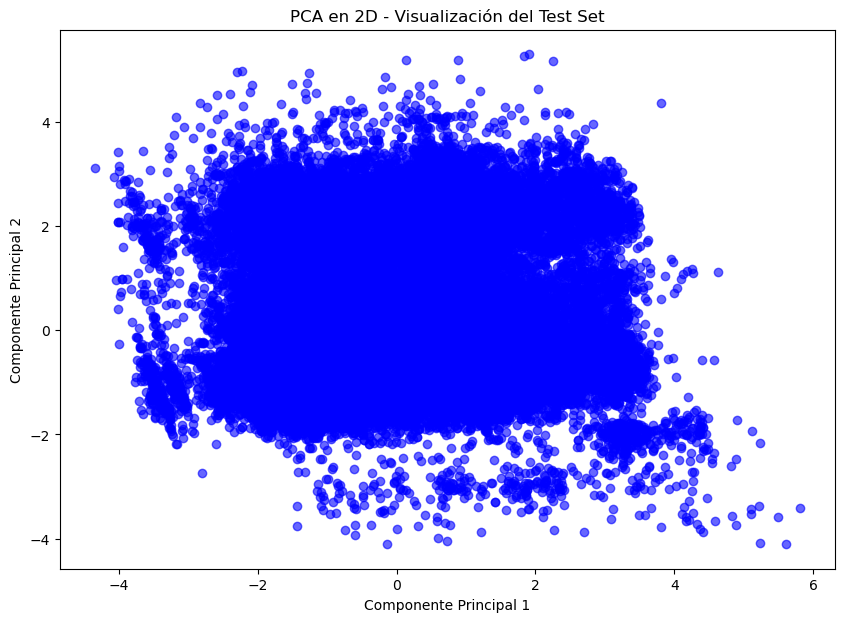

In [17]:
# Estandarizar las características del test set
scaler = StandardScaler()
scaled_features_test = scaler.fit_transform(test_data) 

# Aplicar PCA para reducir a 2 dimensiones en el test set
pca = PCA(n_components=2)
pca_result_test = pca.fit_transform(scaled_features_test)

# Crear un DataFrame con los resultados del PCA
pca_df_test = pd.DataFrame(pca_result_test, columns=['PCA1', 'PCA2'])

# Visualizar los resultados del PCA en 2D
plt.figure(figsize=(10, 7))
plt.scatter(pca_df_test['PCA1'], pca_df_test['PCA2'], alpha=0.6, color='b')
plt.title("PCA en 2D - Visualización del Test Set")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


From the first representation we can deduce that many of the errors are located completely separately in the lower part of the representation and on the right side. As for the representation of the test set, we can see that there is a lower part separated from the rest, so we could intuit that it is an area of ​​tendency for errors.

However, due to the limitations of the PCA algorithm itself, we are going to carry out the same study using the t-SNE algorithm in the next section.

### 2.2- t-SNE
In the t-SNE (T-distributed Stochastic Neighbor Embedding) subsection, this non-linear dimensionality reduction technique is applied to visualize the complex relationships between data points in a two-dimensional space. Unlike other methods, t-SNE is particularly useful for preserving the local structure of the data, facilitating the identification of natural clusters and hidden patterns in high-dimensional data sets.

By projecting the data into two dimensions, t-SNE helps reveal groups and relationships between observations that may not be apparent in the original space. This technique is especially valuable in exploring differences and similarities between points, allowing for a more intuitive and detailed visualization of the internal structure of the data set.


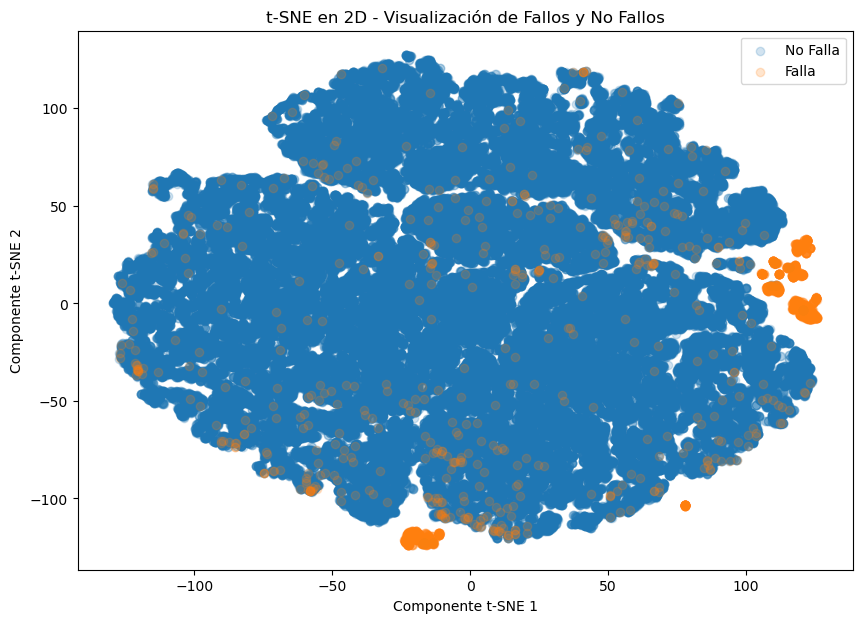

In [18]:
from sklearn.manifold import TSNE

# Aplicar t-SNE para reducir a 2 dimensiones
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(scaled_features)

# Crear un DataFrame con los resultados del t-SNE
tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
tsne_df['Machine failure'] = machine_failure.values

# Visualizar los resultados con diferentes colores para fallos y no fallos
plt.figure(figsize=(10, 7))
for failure_status in [0, 1]:
    subset = tsne_df[tsne_df['Machine failure'] == failure_status]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], 
                label=f'{"No Falla" if failure_status == 0 else "Falla"}', alpha=0.2)

plt.title("t-SNE en 2D - Visualización de Fallos y No Fallos")
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.legend()
plt.show()

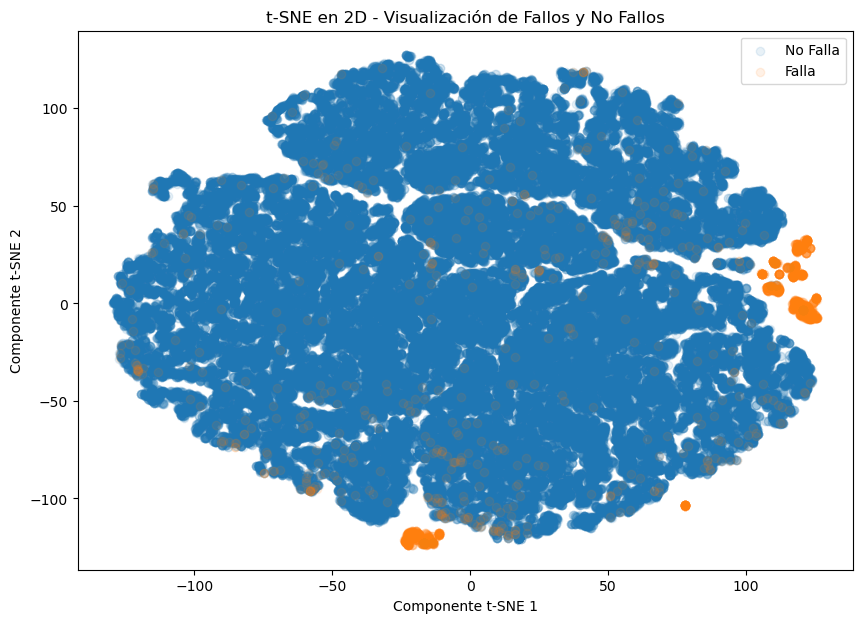

In [19]:
# Visualizar los resultados con diferentes colores para fallos y no fallos
plt.figure(figsize=(10, 7))
for failure_status in [0, 1]:
    subset = tsne_df[tsne_df['Machine failure'] == failure_status]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], 
                label=f'{"No Falla" if failure_status == 0 else "Falla"}', alpha=0.1)

plt.title("t-SNE en 2D - Visualización de Fallos y No Fallos")
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.legend()
plt.show()

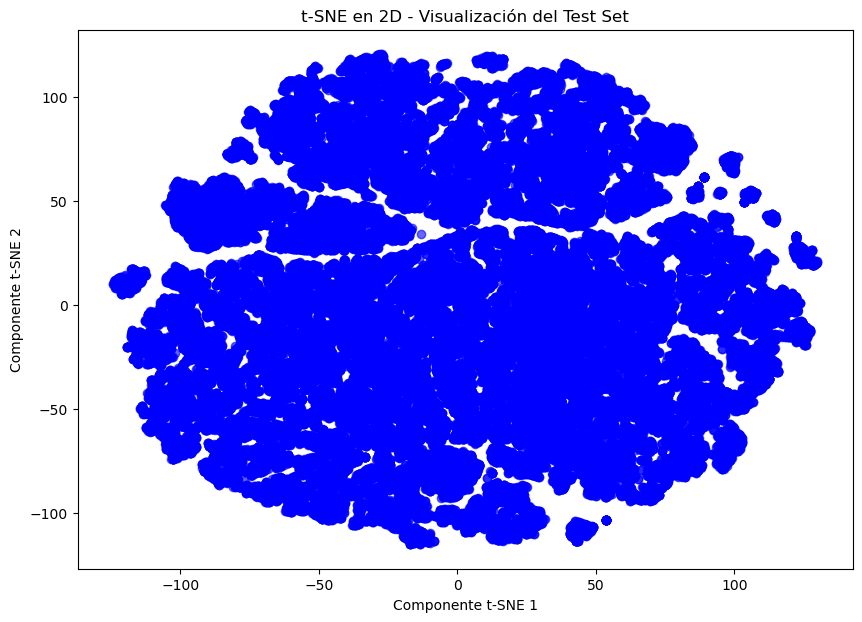

In [20]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Estandarizar las características del test set
scaler = StandardScaler()
scaled_features_test = scaler.fit_transform(test_data)  # Supongamos que `test_data` contiene solo las características seleccionadas

# Aplicar t-SNE para reducir a 2 dimensiones en el test set
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result_test = tsne.fit_transform(scaled_features_test)

# Crear un DataFrame con los resultados del t-SNE
tsne_df_test = pd.DataFrame(tsne_result_test, columns=['TSNE1', 'TSNE2'])

# Visualizar los resultados del t-SNE en 2D
plt.figure(figsize=(10, 7))
plt.scatter(tsne_df_test['TSNE1'], tsne_df_test['TSNE2'], alpha=0.6, color='b')
plt.title("t-SNE en 2D - Visualización del Test Set")
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.show()


### 2.3- K-Means
K-Means is an unsupervised clustering algorithm that organizes data into a predefined number of clusters (groups) based on the similarity between points. The algorithm iterates to adjust the centroids of each cluster until the distance of the points to the nearest centroid is minimized. The simplicity and effectiveness of K-Means make it especially useful for identifying underlying patterns in complex data sets, providing a clear segmentation of observations into distinct groups.

In the context of failure prediction, K-Means can help group data into high- and low-risk areas based on historical patterns and characteristics shared by the data points. By analyzing the generated clusters, it is possible to identify groups that present a higher percentage of failures and classify them as high-risk areas. This allows the classification model to leverage this information to improve the accuracy of predictions, helping to anticipate failures more effectively.

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


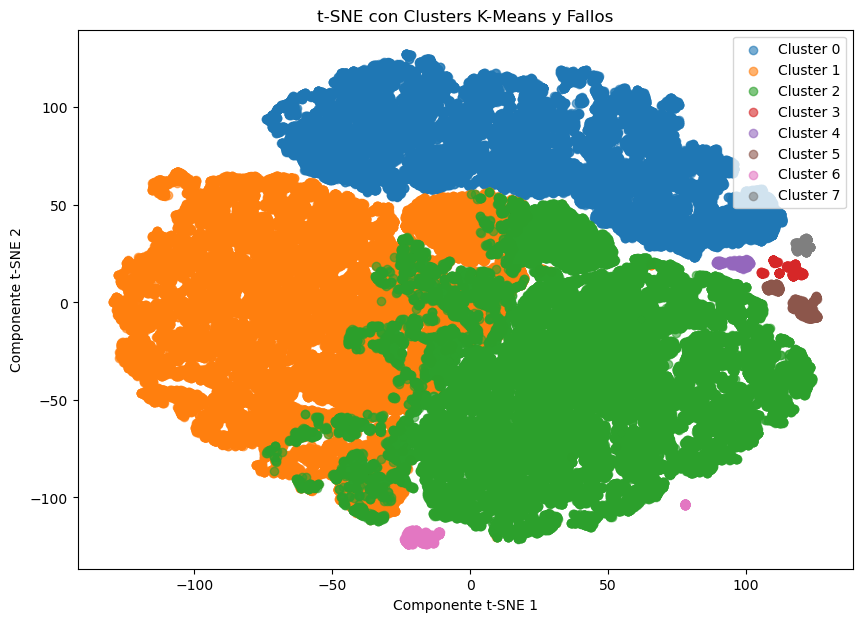

In [126]:
from sklearn.cluster import KMeans

# Aplicar K-Means para crear 3 clusters en los resultados de t-SNE
kmeans = KMeans(n_clusters=8, random_state=4)
tsne_df['Cluster'] = kmeans.fit_predict(scaled_features_train)

# Visualizar los resultados de t-SNE con los clusters
plt.figure(figsize=(10, 7))
for cluster in range(8):
    subset = tsne_df[tsne_df['Cluster'] == cluster]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=f'Cluster {cluster}', alpha=0.6)

plt.title("t-SNE con Clusters K-Means y Fallos")
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.legend()
plt.show()

In [127]:
# Calcular el porcentaje de errores en cada cluster
# Asumiendo que `Machine failure` es la columna que indica errores (1 = fallo, 0 = no fallo)
error_percentage = tsne_df.groupby('Cluster')['Machine failure'].mean() * 100

# Mostrar el porcentaje de errores en cada cluster
error_percentage_df = error_percentage.reset_index()
error_percentage_df.columns = ['Cluster', 'Error Percentage']
print(error_percentage_df)

   Cluster  Error Percentage
0        0          0.311998
1        1          0.346965
2        2          0.444394
3        3         99.047619
4        4          1.628664
5        5         99.053628
6        6         99.180328
7        7        100.000000


We can see that in half of the clusters there is a high risk of errors appearing (more than 99%). In the other half, the risk is low in 3 of them, and in one of them the ratio of errors to no errors is practically the same. Therefore, we are going to decide to divide the clusters into two types: high risk and low risk.

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Escalar las características de train_data y test_data para una mejor agrupación
scaler = StandardScaler()
scaled_features_train = scaler.fit_transform(train_data.drop(columns=['Machine failure']))  # Escalamos sin incluir la variable objetivo
scaled_features_test = scaler.transform(test_data)

# Aplicar K-Means con 8 clusters en el conjunto de entrenamiento
kmeans = KMeans(n_clusters=8, random_state=4)
train_data['Cluster'] = kmeans.fit_predict(scaled_features_train)

# Usar el modelo ajustado para asignar clusters en el conjunto de prueba
test_data['Cluster'] = kmeans.predict(scaled_features_test)

# Confirmar que se ha agregado la columna de clusters
print(train_data[['Cluster', 'Machine failure']].head())
print(test_data[['Cluster']].head())


C:\Users\soler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   Cluster  Machine failure
0        2                0
1        0                0
2        1                0
3        2                0
4        0                0
   Cluster
0        2
1        2
2        2
3        0
4        0


C:\Users\soler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


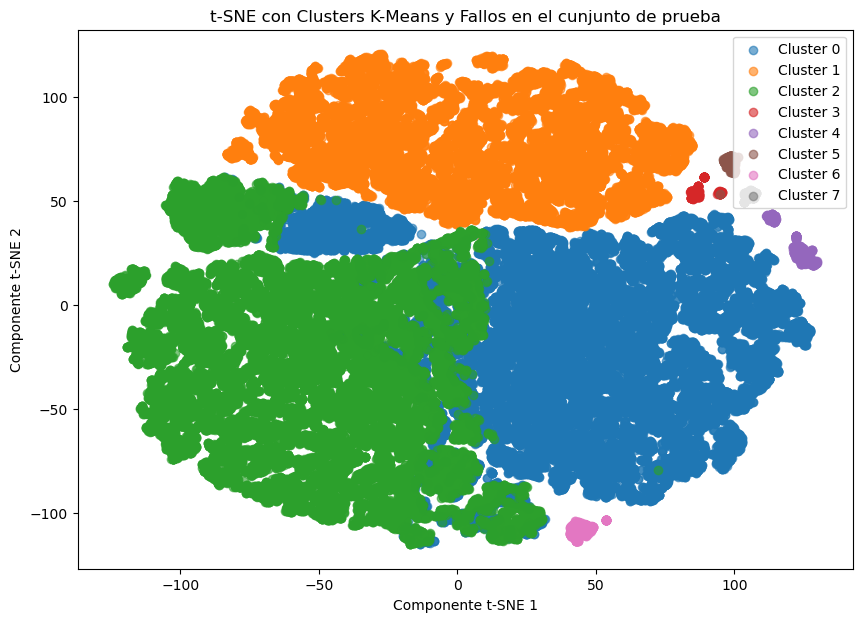

In [128]:
# Aplicar K-Means para crear 3 clusters en los resultados de t-SNE
tsne_df_test['Cluster'] = kmeans.fit_predict(scaled_features_test)

# Visualizar los resultados de t-SNE con los clusters
plt.figure(figsize=(10, 7))
for cluster in range(8):
    subset = tsne_df_test[tsne_df_test['Cluster'] == cluster]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=f'Cluster {cluster}', alpha=0.6)

plt.title("t-SNE con Clusters K-Means y Fallos en el cunjunto de prueba")
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.legend()
plt.show()



The Elbow method is a visual technique that helps to identify the optimal number of clusters for the K-Means algorithm. In this method, the inertia (sum of squared distances from each point to the nearest centroid) is calculated for various cluster values. The inertia is then plotted as a function of the number of clusters.

As the number of clusters increases, the inertia decreases, as the points are closer to their centroids. However, beyond a certain point, the reduction in inertia becomes less significant, forming a sort of "elbow" in the graph. This point indicates the ideal number of clusters, as it represents a balance between model complexity and cluster compactness. Using the optimal number of clusters improves the interpretation of the results and prevents overfitting in the K-Means model.

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

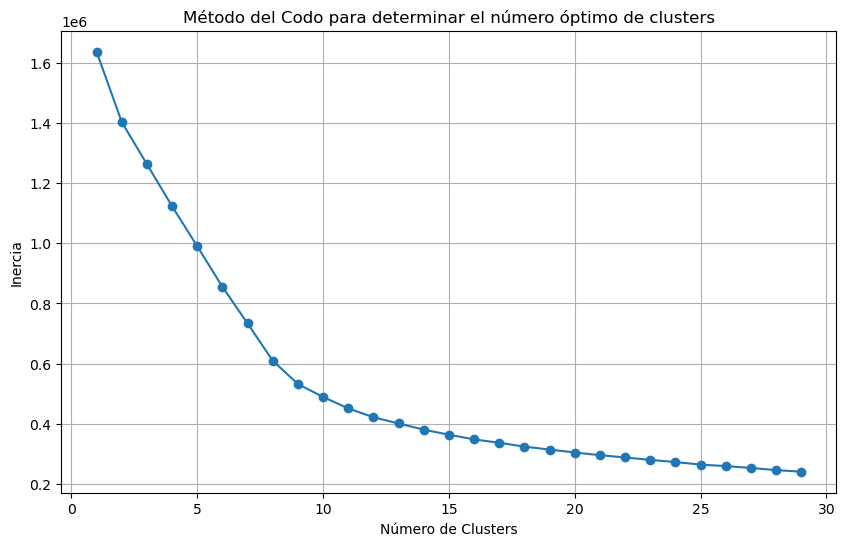

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Definir un rango de valores para el número de clusters
inertias = []
range_n_clusters = range(1, 30)

# Calcular la inercia para cada número de clusters
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=4)
    kmeans.fit(scaled_features)  # Usar características escaladas (o los resultados de t-SNE si es lo que se quiere evaluar)
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertias, marker='o')
plt.title("Método del Codo para determinar el número óptimo de clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()


According to the Elbow method, the ideal number of clusters would be between 8 and 10 clusters, which is the area where the curve is smoothed. For our purposes, the choice will be 8 clusters.

In [87]:
# Definir los clusters de alto riesgo según los porcentajes de error
high_risk_clusters = [3, 4, 6, 7]

# Crear la columna 'Zona_Riesgo' en train_data y test_data
train_data['Zona_Riesgo'] = train_data['Cluster'].apply(lambda x: 1 if x in high_risk_clusters else 0)
test_data['Zona_Riesgo'] = test_data['Cluster'].apply(lambda x: 1 if x in high_risk_clusters else 0)

# Verificar las primeras filas para confirmar la nueva columna
print(train_data[['Cluster', 'Zona_Riesgo', 'Machine failure']].head())
print(test_data[['Cluster', 'Zona_Riesgo']].head())


   Cluster  Zona_Riesgo  Machine failure
0        2            0                0
1        0            0                0
2        1            0                0
3        2            0                0
4        0            0                0
   Cluster  Zona_Riesgo
0        2            0
1        2            0
2        2            0
3        0            0
4        0            0


In [91]:
# Definir los clusters de alto riesgo según los porcentajes de error
high_risk_clusters = [3, 4, 6, 7]

# Crear la columna 'Zona_Riesgo' en tsne_df
tsne_df['Zona_Riesgo'] = tsne_df['Cluster'].apply(lambda x: 1 if x in high_risk_clusters else 0)

# Verificar las primeras filas para confirmar la nueva columna
print(tsne_df[['Cluster', 'Zona_Riesgo']].head())


   Cluster  Zona_Riesgo
0        1            0
1        2            0
2        0            0
3        1            0
4        2            0


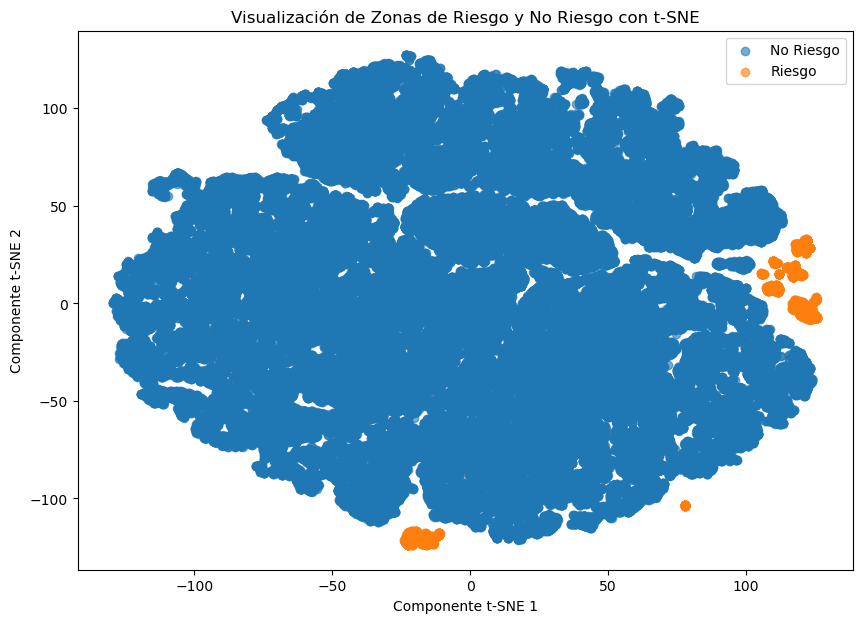

In [92]:
import matplotlib.pyplot as plt

# Asignar colores diferentes para zonas de riesgo y no riesgo
plt.figure(figsize=(10, 7))
for zona_riesgo in [0, 1]:
    subset = tsne_df[tsne_df['Zona_Riesgo'] == zona_riesgo]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], 
                label=f'{"No Riesgo" if zona_riesgo == 0 else "Riesgo"}', alpha=0.6)

# Configurar el gráfico
plt.title("Visualización de Zonas de Riesgo y No Riesgo con t-SNE")
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.legend()
plt.show()


In [93]:
# Definir los clusters de alto riesgo según los porcentajes de error
high_risk_clusters = [3, 4, 6, 7]

# Aplicar el modelo K-Means ya ajustado para asignar clusters en el conjunto de prueba
tsne_df_test['Cluster'] = kmeans.predict(scaled_features_test)  # Utilizar las características escaladas del conjunto de prueba

# Crear la columna 'Zona_Riesgo' en tsne_df_test
tsne_df_test['Zona_Riesgo'] = tsne_df_test['Cluster'].apply(lambda x: 1 if x in high_risk_clusters else 0)

# Verificar las primeras filas para confirmar la nueva columna
print(tsne_df_test[['Cluster', 'Zona_Riesgo']].head())


   Cluster  Zona_Riesgo
0        0            0
1        0            0
2        0            0
3        1            0
4        1            0


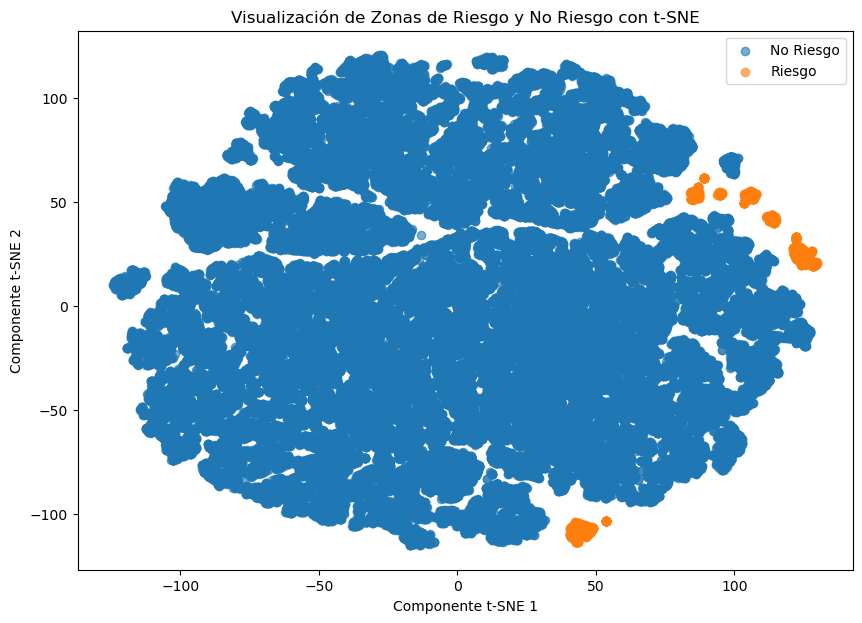

In [94]:
import matplotlib.pyplot as plt

# Asignar colores diferentes para zonas de riesgo y no riesgo
plt.figure(figsize=(10, 7))
for zona_riesgo in [0, 1]:
    subset = tsne_df_test[tsne_df_test['Zona_Riesgo'] == zona_riesgo]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], 
                label=f'{"No Riesgo" if zona_riesgo == 0 else "Riesgo"}', alpha=0.6)

# Configurar el gráfico
plt.title("Visualización de Zonas de Riesgo y No Riesgo con t-SNE")
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.legend()
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN para detectar anomalías
dbscan = DBSCAN(eps=0.95, min_samples=5)  # Ajusta los parámetros eps y min_samples según sea necesario
tsne_df['Cluster'] = dbscan.fit_predict(tsne_result)

# Identificar y visualizar las anomalías (puntos con Cluster = -1)
anomalies = tsne_df[tsne_df['Cluster'] == -1]

plt.figure(figsize=(10, 7))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], color='lightgray', alpha=0.5, label='Normal Points')
plt.scatter(anomalies['TSNE1'], anomalies['TSNE2'], color='red', alpha=0.8, label='Anomalies (Noise)')

plt.title("t-SNE con DBSCAN - Identificación de Anomalías")
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.legend()
plt.show()

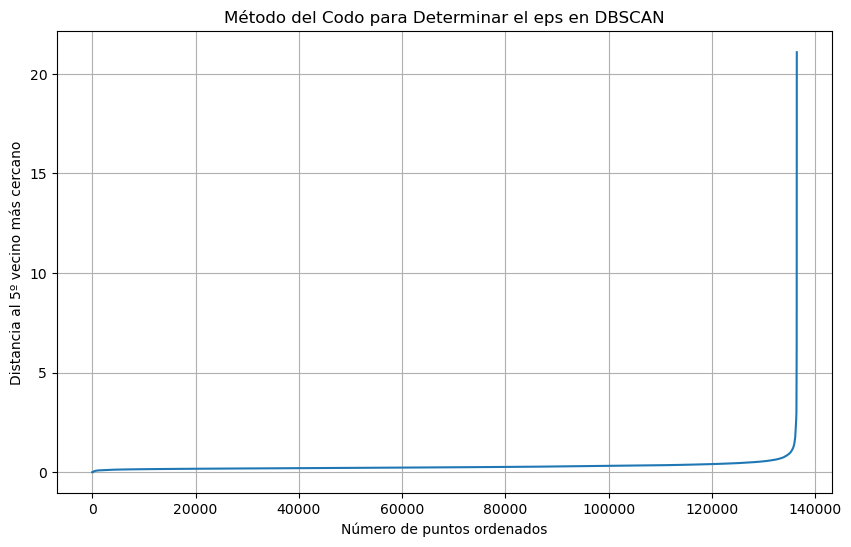

In [75]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Determinar el eps óptimo utilizando el método del codo
nearest_neighbors = NearestNeighbors(n_neighbors=5)  # min_samples = 5 se toma como referencia
neighbors_fit = nearest_neighbors.fit(scaled_features)
distances, indices = neighbors_fit.kneighbors(scaled_features)

# Ordenar las distancias al quinto vecino más cercano
distances = np.sort(distances[:, 4], axis=0)  # Tomar la columna 4 para el quinto vecino

# Graficar las distancias para identificar el codo
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title("Método del Codo para Determinar el eps en DBSCAN")
plt.xlabel("Número de puntos ordenados")
plt.ylabel("Distancia al 5º vecino más cercano")
plt.grid(True)
plt.show()

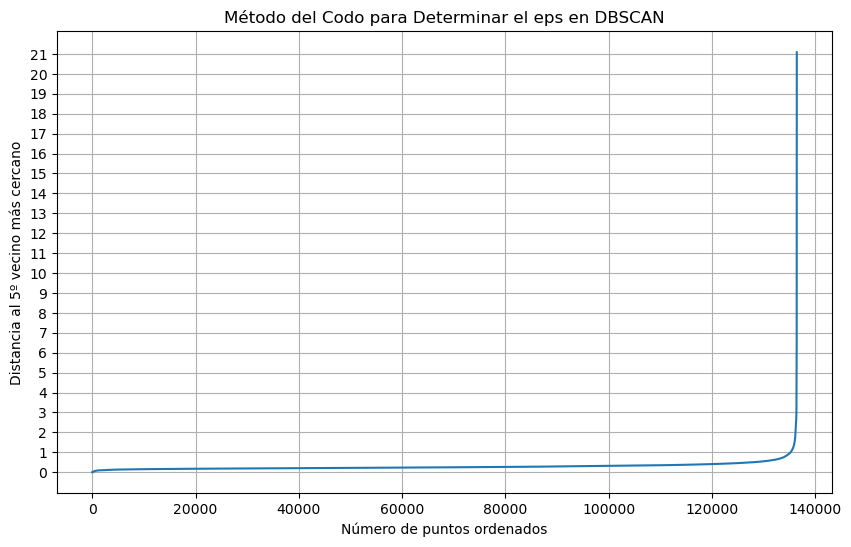

In [76]:
import matplotlib.pyplot as plt
import numpy as np

def on_move(event):
    # Verificar si el ratón está sobre el gráfico
    if event.inaxes:
        # Obtener las coordenadas actuales del ratón
        x, y = event.xdata, event.ydata
        # Actualizar el texto de las coordenadas en la figura
        coord_text.set_text(f"x = {int(x)}, y = {y:.2f}")
        # Redibujar la figura para que se actualice el texto
        fig.canvas.draw_idle()

# Graficar las distancias para identificar el codo
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(distances)
plt.title("Método del Codo para Determinar el eps en DBSCAN")
plt.xlabel("Número de puntos ordenados")
plt.ylabel("Distancia al 5º vecino más cercano")
plt.grid(True)

# Ajustar el eje Y para que tenga un intervalo de 0.2
y_min, y_max = np.min(distances), np.max(distances)
plt.yticks(np.arange(y_min, y_max, 1))

# Crear un texto en la gráfica para mostrar las coordenadas
coord_text = ax.text(0.7, 0.9, "", transform=ax.transAxes, ha="left")

# Conectar el evento de movimiento del ratón a la función on_move
fig.canvas.mpl_connect('motion_notify_event', on_move)

plt.show()



In [77]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN para detectar anomalías en los datos originales
dbscan = DBSCAN(eps=0.95, min_samples=5)  # Ajusta eps y min_samples según corresponda
train_data['Anomaly'] = dbscan.fit_predict(scaled_features)

# Las anomalías se marcan con -1
anomalies_original = train_data[train_data['Anomaly'] == -1]

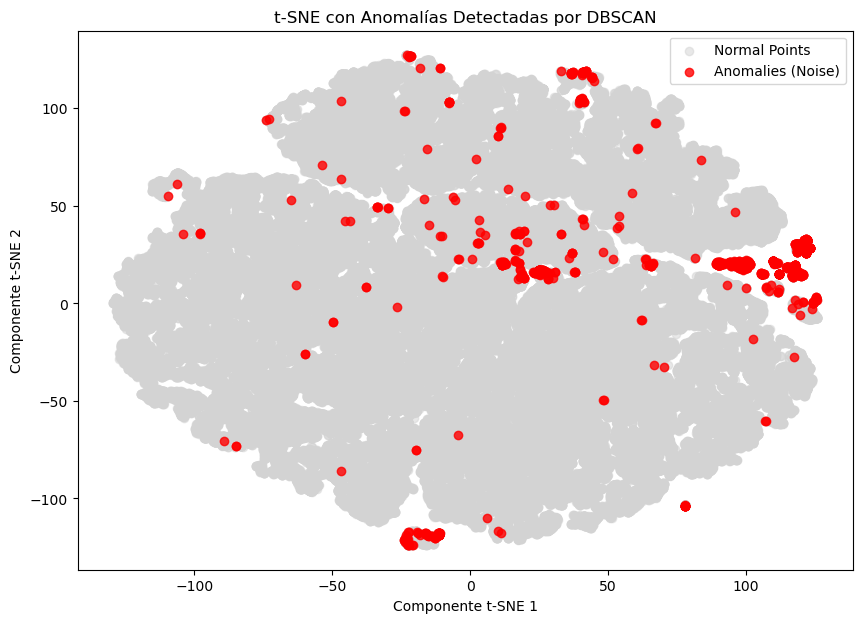

In [78]:
tsne_df['Anomaly'] = train_data['Anomaly'].values

# Visualizar los resultados de t-SNE destacando las anomalías detectadas por DBSCAN
plt.figure(figsize=(10, 7))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], color='lightgray', alpha=0.5, label='Normal Points')
plt.scatter(tsne_df[tsne_df['Anomaly'] == -1]['TSNE1'], tsne_df[tsne_df['Anomaly'] == -1]['TSNE2'], 
            color='red', alpha=0.8, label='Anomalies (Noise)')

plt.title("t-SNE con Anomalías Detectadas por DBSCAN")
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.legend()
plt.show()

In [79]:
# Filtrar anomalías detectadas por DBSCAN
anomalies = train_data[train_data['Anomaly'] == -1]

# Contar cuántas de las anomalías coinciden con Machine failure
anomalies_with_failure = anomalies[anomalies['Machine failure'] == 1]

# Calcular el número total de anomalías y el número de coincidencias
total_anomalies = len(anomalies)
total_anomalies_with_failure = len(anomalies_with_failure)

# Mostrar los resultados
print(f"Total de anomalías detectadas: {total_anomalies}")
print(f"Total de anomalías que coinciden con fallos: {total_anomalies_with_failure}")
print(f"Porcentaje de anomalías que coinciden con fallos: {total_anomalies_with_failure / total_anomalies * 100:.2f}%")


Total de anomalías detectadas: 936
Total de anomalías que coinciden con fallos: 498
Porcentaje de anomalías que coinciden con fallos: 53.21%


In [80]:
from sklearn.ensemble import IsolationForest

# Aplicar Isolation Forest
isolation_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
train_data['IF_Anomaly'] = isolation_forest.fit_predict(scaled_features)

# Las anomalías se marcan con -1
anomalies_if = train_data[train_data['IF_Anomaly'] == -1]

# Calcular cuántas de las anomalías detectadas coinciden con Machine failure
anomalies_with_failure_if = anomalies_if[anomalies_if['Machine failure'] == 1]
total_anomalies_if = len(anomalies_if)
total_anomalies_with_failure_if = len(anomalies_with_failure_if)

# Mostrar los resultados
print(f"Total de anomalías detectadas por Isolation Forest: {total_anomalies_if}")
print(f"Total de anomalías que coinciden con fallos: {total_anomalies_with_failure_if}")
print(f"Porcentaje de anomalías que coinciden con fallos: {total_anomalies_with_failure_if / total_anomalies_if * 100:.2f}%")


Total de anomalías detectadas por Isolation Forest: 25558
Total de anomalías que coinciden con fallos: 1665
Porcentaje de anomalías que coinciden con fallos: 6.51%


In [130]:
from sklearn.svm import OneClassSVM

# Aplicar One-Class SVM
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.005)  # Ajusta nu para controlar la proporción de anomalías
train_data['OCSVM_Anomaly'] = ocsvm.fit_predict(scaled_features)

# Las anomalías se marcan con -1
anomalies_ocsvm = train_data[train_data['OCSVM_Anomaly'] == -1]

# Calcular cuántas de las anomalías detectadas coinciden con Machine failure
anomalies_with_failure_ocsvm = anomalies_ocsvm[anomalies_ocsvm['Machine failure'] == 1]
total_anomalies_ocsvm = len(anomalies_ocsvm)
total_anomalies_with_failure_ocsvm = len(anomalies_with_failure_ocsvm)

# Mostrar los resultados
print(f"Total de anomalías detectadas por One-Class SVM: {total_anomalies_ocsvm}")
print(f"Total de anomalías que coinciden con fallos: {total_anomalies_with_failure_ocsvm}")
print(f"Porcentaje de anomalías que coinciden con fallos: {total_anomalies_with_failure_ocsvm / total_anomalies_ocsvm * 100:.2f}%")


Total de anomalías detectadas por One-Class SVM: 688
Total de anomalías que coinciden con fallos: 425
Porcentaje de anomalías que coinciden con fallos: 61.77%


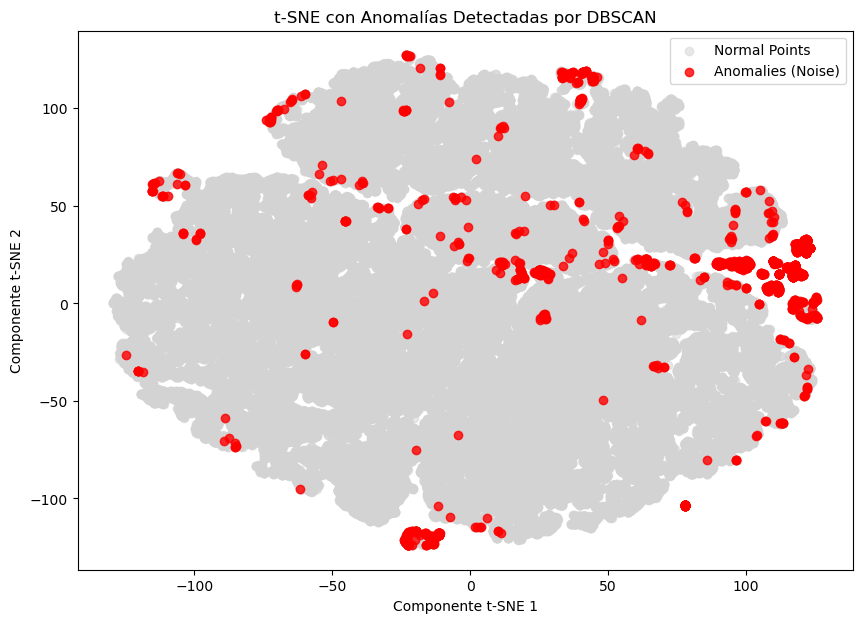

In [82]:
tsne_df['Anomaly'] = train_data['OCSVM_Anomaly'].values

# Visualizar los resultados de t-SNE destacando las anomalías detectadas por DBSCAN
plt.figure(figsize=(10, 7))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], color='lightgray', alpha=0.5, label='Normal Points')
plt.scatter(tsne_df[tsne_df['Anomaly'] == -1]['TSNE1'], tsne_df[tsne_df['Anomaly'] == -1]['TSNE2'], 
            color='red', alpha=0.8, label='Anomalies (Noise)')

plt.title("t-SNE con Anomalías Detectadas por DBSCAN")
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.legend()
plt.show()

In [83]:
from sklearn.svm import OneClassSVM

# Rango de valores de nu para probar
nu_values = [0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2]

# Guardar los resultados de cada valor de nu
results = []

for nu in nu_values:
    # Aplicar One-Class SVM con el valor de nu actual
    ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=nu)
    train_data['OCSVM_Anomaly'] = ocsvm.fit_predict(scaled_features)
    
    # Filtrar las anomalías
    anomalies_ocsvm = train_data[train_data['OCSVM_Anomaly'] == -1]
    
    # Calcular coincidencias con Machine failure
    anomalies_with_failure_ocsvm = anomalies_ocsvm[anomalies_ocsvm['Machine failure'] == 1]
    total_anomalies_ocsvm = len(anomalies_ocsvm)
    total_anomalies_with_failure_ocsvm = len(anomalies_with_failure_ocsvm)
    coincidence_percentage = total_anomalies_with_failure_ocsvm / total_anomalies_ocsvm * 100 if total_anomalies_ocsvm > 0 else 0
    
    # Guardar los resultados
    results.append({
        'nu': nu,
        'Total Anomalías': total_anomalies_ocsvm,
        'Coincidencias con Fallos': total_anomalies_with_failure_ocsvm,
        'Porcentaje de Coincidencias': coincidence_percentage
    })

# Mostrar los resultados
results_df = pd.DataFrame(results)
print(results_df)


      nu  ...  Porcentaje de Coincidencias
0  0.001  ...                    60.220994
1  0.005  ...                    61.773256
2  0.010  ...                    54.200146
3  0.050  ...                    25.721823
4  0.100  ...                    13.372434
5  0.150  ...                     9.137552
6  0.200  ...                     6.974528

[7 rows x 4 columns]


In [84]:
# Aplicar One-Class SVM con nu = 0.005
ocsvm_optimal = OneClassSVM(kernel='rbf', gamma='auto', nu=0.005)
train_data['Anomalia_OCSVM'] = ocsvm_optimal.fit_predict(scaled_features)

# Convertir las anomalías (marcadas como -1) a una columna binaria de 0 y 1
train_data['Anomalia_OCSVM'] = (train_data['Anomalia_OCSVM'] == -1).astype(int)

# Verificar las primeras filas para confirmar la nueva columna
print(train_data[['Anomalia_OCSVM', 'Machine failure']].head())


   Anomalia_OCSVM  Machine failure
0               0                0
1               0                0
2               0                0
3               0                0
4               0                0


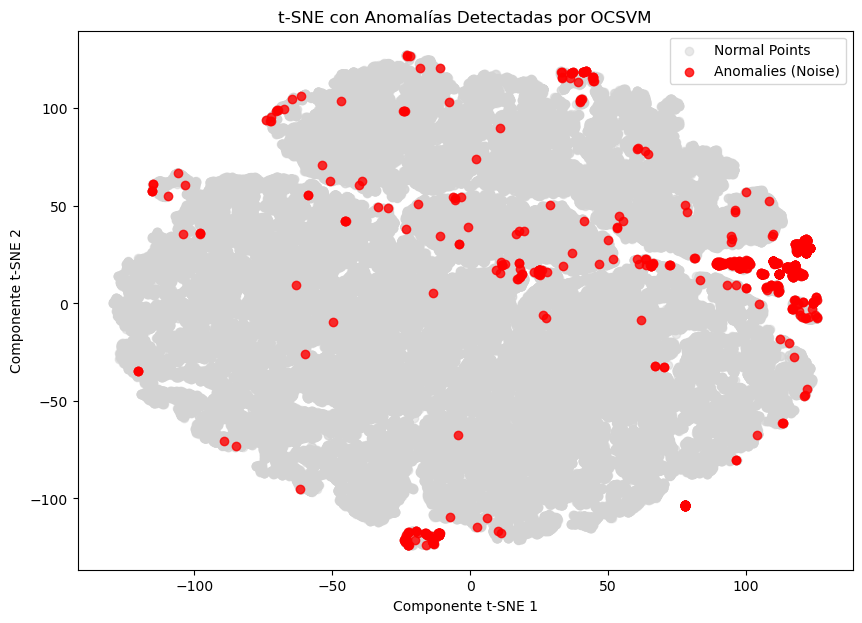

In [138]:
tsne_df['Anomaly'] = train_data['Anomalia_OCSVM'].values

# Visualizar los resultados de t-SNE destacando las anomalías detectadas por DBSCAN
plt.figure(figsize=(10, 7))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], color='lightgray', alpha=0.5, label='Normal Points')
plt.scatter(tsne_df[tsne_df['Anomaly'] == 1]['TSNE1'], tsne_df[tsne_df['Anomaly'] == 1]['TSNE2'], 
            color='red', alpha=0.8, label='Anomalies (Noise)')

plt.title("t-SNE con Anomalías Detectadas por OCSVM")
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.legend()
plt.show()

In [135]:
# Aplicar One-Class SVM con nu = 0.005
test_data['Anomalia_OCSVM'] = ocsvm_optimal.fit_predict(scaled_features_test)

# Convertir las anomalías (marcadas como -1) a una columna binaria de 0 y 1
test_data['Anomalia_OCSVM'] = (test_data['Anomalia_OCSVM'] == -1).astype(int)

# Verificar las primeras filas para confirmar la nueva columna
print(test_data[['Anomalia_OCSVM']].head())


   Anomalia_OCSVM
0               0
1               0
2               0
3               0
4               0


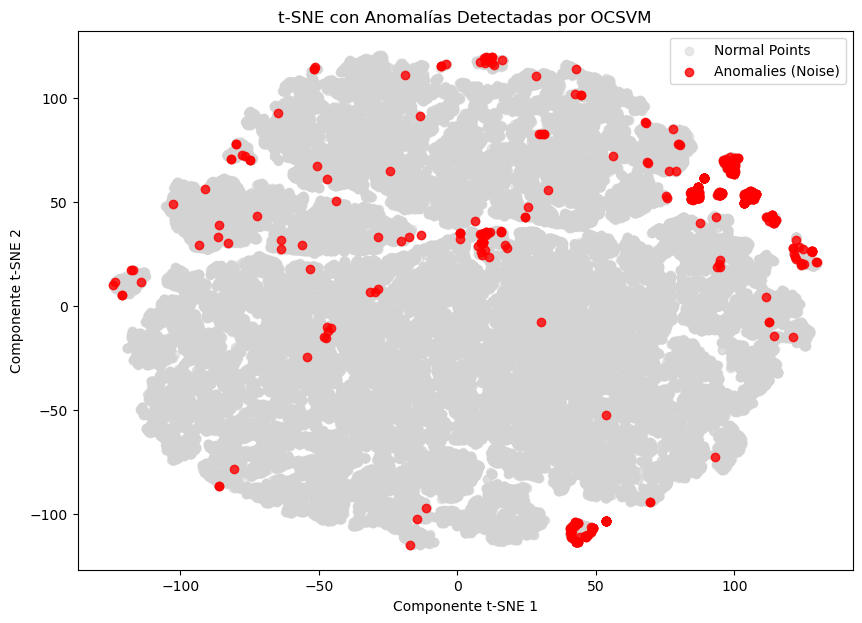

In [137]:
tsne_df_test['Anomaly'] = test_data['Anomalia_OCSVM'].values

# Visualizar los resultados de t-SNE destacando las anomalías detectadas por DBSCAN
plt.figure(figsize=(10, 7))
plt.scatter(tsne_df_test['TSNE1'], tsne_df_test['TSNE2'], color='lightgray', alpha=0.5, label='Normal Points')
plt.scatter(tsne_df_test[tsne_df_test['Anomaly'] == 1]['TSNE1'], tsne_df_test[tsne_df_test['Anomaly'] == 1]['TSNE2'], 
            color='red', alpha=0.8, label='Anomalies (Noise)')

plt.title("t-SNE con Anomalías Detectadas por OCSVM en el conjunto de pruebas")
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.legend()
plt.show()

In [95]:
train_data.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Type_L',
       'Type_M', 'Cluster', 'Anomaly', 'IF_Anomaly', 'OCSVM_Anomaly',
       'Anomalia_OCSVM', 'Zona_Riesgo'],
      dtype='object')

In [98]:
X.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF', 'Type_L', 'Type_M', 'Zona_Riesgo'],
      dtype='object')

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

# Seleccionar todas las características relevantes excluyendo 'Machine failure' y columnas no necesarias
X = train_data.drop(['Machine failure', 'Cluster', 'Anomaly', 'IF_Anomaly', 'OCSVM_Anomaly',
       'Anomalia_OCSVM'], axis=1, errors='ignore')
y = train_data['Machine failure']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalar los datos (tanto el conjunto de entrenamiento como de prueba)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar un modelo de Regresión Logística con los datos escalados
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Predecir las probabilidades en el conjunto de prueba
y_pred_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]  # Probabilidad de la clase positiva (fallo)

# Calcular el AUC-ROC
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC de la Regresión Logística Múltiple (con datos escalados): {auc:.4f}")


AUC-ROC de la Regresión Logística Múltiple (con datos escalados): 0.9300


In [99]:
# Mostrar los coeficientes de la Regresión Logística
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logistic_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)


                    Feature  Coefficient
3               Torque [Nm]     1.172655
6                       HDF     0.734863
0       Air temperature [K]     0.608854
2    Rotational speed [rpm]     0.542878
5                       TWF     0.508627
7                       PWF     0.475012
8                       OSF     0.439290
4           Tool wear [min]     0.305673
12              Zona_Riesgo     0.197555
10                   Type_L    -0.042969
9                       RNF    -0.104650
11                   Type_M    -0.168270
1   Process temperature [K]    -0.396885


In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Entrenar un modelo de Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predecir las probabilidades en el conjunto de prueba
y_pred_prob_rf = random_forest_model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva (fallo)

# Calcular el AUC-ROC
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print(f"AUC-ROC del modelo Random Forest: {auc_rf:.4f}")

# Visualizar la importancia de las características
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': random_forest_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

AUC-ROC del modelo Random Forest: 0.9395
                  Feature  Importance
6                     HDF    0.278226
12            Zona_Riesgo    0.146017
8                     OSF    0.124142
3               Torque_Nm    0.085137
2    Rotational_speed_rpm    0.073216
7                     PWF    0.067066
4           Tool_wear_min    0.059007
5                     TWF    0.049830
0       Air_temperature_K    0.045595
1   Process_temperature_K    0.037495
9                     RNF    0.029560
10                 Type_L    0.002710
11                 Type_M    0.001998


In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

# Definir el conjunto de hiperparámetros a probar
param_dist = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Crear el clasificador Random Forest
random_forest = RandomForestClassifier(random_state=42)

# Configurar la búsqueda aleatoria con 5 validaciones cruzadas
random_search = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_dist,
    n_iter=50,  # Número de combinaciones aleatorias a probar
    scoring='roc_auc',  # Métrica para evaluar
    cv=5,  # Número de pliegues para la validación cruzada
    random_state=42,
    n_jobs=-1  # Usar todos los núcleos disponibles para acelerar
)

# Ajustar el modelo a los datos de entrenamiento
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = random_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Entrenar un Random Forest con los mejores hiperparámetros encontrados
best_random_forest = RandomForestClassifier(**best_params, random_state=42)
best_random_forest.fit(X_train, y_train)

# Predecir las probabilidades en el conjunto de prueba
y_pred_prob_best_rf = best_random_forest.predict_proba(X_test)[:, 1]

# Calcular el AUC-ROC
best_auc_rf = roc_auc_score(y_test, y_pred_prob_best_rf)
print(f"AUC-ROC del modelo Random Forest ajustado: {best_auc_rf:.4f}")


Mejores hiperparámetros: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None}
AUC-ROC del modelo Random Forest ajustado: 0.9532


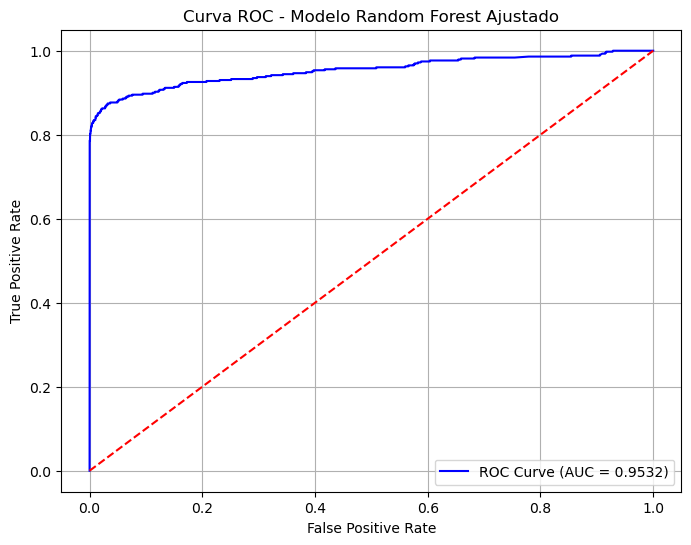

In [113]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calcular las tasas TPR y FPR para la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_best_rf)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {best_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Modelo Random Forest Ajustado')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
y_pred_prob_best_rf[y_pred_prob_best_rf > 0.5]

In [ ]:
!pip install xgboost


In [101]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Crear el modelo de XGBoost
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Predecir las probabilidades en el conjunto de prueba
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calcular el AUC-ROC
auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
print(f"AUC-ROC del modelo XGBoost: {auc_xgb:.4f}")

AUC-ROC del modelo XGBoost: 0.9537


C:\Users\soler\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:37:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [100]:
# Limpiar nombres de las características para que sean válidos en XGBoost
X.columns = X.columns.str.replace('[', '').str.replace(']', '').str.replace('<', '').str.replace('>', '').str.replace(' ', '_')

# Verificar los nombres de las características
print(X.columns)


Index(['Air_temperature_K', 'Process_temperature_K', 'Rotational_speed_rpm',
       'Torque_Nm', 'Tool_wear_min', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
       'Type_L', 'Type_M', 'Zona_Riesgo'],
      dtype='object')


In [102]:
# Obtener la importancia de características en XGBoost
feature_importances_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Importancia de características en XGBoost:")
print(feature_importances_xgb)


Importancia de características en XGBoost:
                  Feature  Importance
12            Zona_Riesgo    0.475163
6                     HDF    0.369191
9                     RNF    0.118160
2    Rotational_speed_rpm    0.006263
3               Torque_Nm    0.005680
0       Air_temperature_K    0.004318
4           Tool_wear_min    0.004216
1   Process_temperature_K    0.003984
10                 Type_L    0.003683
11                 Type_M    0.003505
5                     TWF    0.002996
7                     PWF    0.001802
8                     OSF    0.001041


In [103]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Definir el conjunto de hiperparámetros a probar
param_dist_xgb = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10, 15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.3, 0.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Crear el modelo XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', use_label_encoder=False, random_state=42)

# Configurar la búsqueda aleatoria con 5 validaciones cruzadas
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=50,  # Número de combinaciones aleatorias a probar
    scoring='roc_auc',
    cv=5,  # Número de pliegues para la validación cruzada
    random_state=42,
    n_jobs=-1
)

# Ajustar el modelo a los datos de entrenamiento
random_search_xgb.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params_xgb = random_search_xgb.best_params_
print(f"Mejores hiperparámetros para XGBoost: {best_params_xgb}")

# Entrenar un modelo XGBoost con los mejores hiperparámetros
best_xgb_model = xgb.XGBClassifier(**best_params_xgb, objective='binary:logistic', eval_metric='auc', use_label_encoder=False, random_state=42)
best_xgb_model.fit(X_train, y_train)

# Predecir las probabilidades en el conjunto de prueba
y_pred_prob_best_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# Calcular el AUC-ROC
best_auc_xgb = roc_auc_score(y_test, y_pred_prob_best_xgb)
print(f"AUC-ROC del modelo XGBoost ajustado: {best_auc_xgb:.4f}")


C:\Users\soler\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:39:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores hiperparámetros para XGBoost: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 15, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.6}


C:\Users\soler\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:39:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AUC-ROC del modelo XGBoost ajustado: 0.9547


In [104]:
# Obtener la importancia de características en XGBoost ajustado
feature_importances_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Importancia de características en XGBoost ajustado:")
print(feature_importances_xgb)


Importancia de características en XGBoost ajustado:
                  Feature  Importance
6                     HDF    0.371767
12            Zona_Riesgo    0.284585
8                     OSF    0.120506
7                     PWF    0.090179
5                     TWF    0.060415
9                     RNF    0.055503
3               Torque_Nm    0.004021
2    Rotational_speed_rpm    0.003891
0       Air_temperature_K    0.002551
4           Tool_wear_min    0.002106
1   Process_temperature_K    0.001927
10                 Type_L    0.001517
11                 Type_M    0.001032


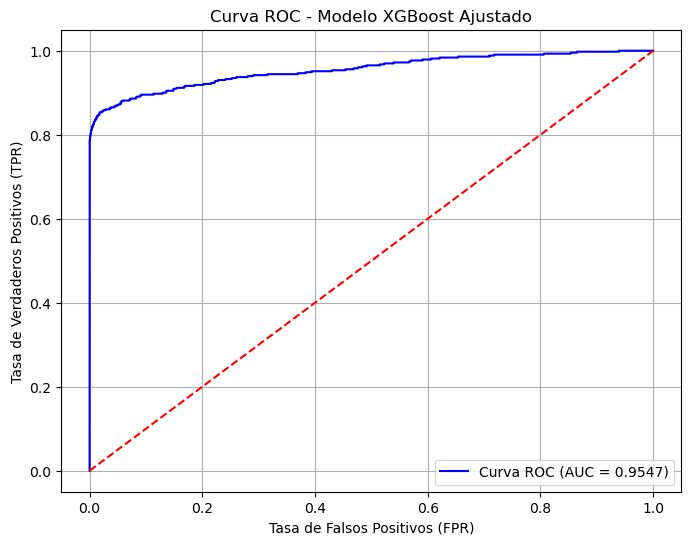

In [105]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calcular las tasas TPR y FPR para la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_best_xgb)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {best_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Modelo XGBoost Ajustado')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
!pip install lightgbm


In [106]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Crear el modelo de LightGBM
lgb_model = lgb.LGBMClassifier(
    objective='binary',
    metric='auc',
    random_state=42
)

# Entrenar el modelo
lgb_model.fit(X_train, y_train)

# Predecir las probabilidades en el conjunto de prueba
y_pred_prob_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Calcular el AUC-ROC
auc_lgb = roc_auc_score(y_test, y_pred_prob_lgb)
print(f"AUC-ROC del modelo LightGBM: {auc_lgb:.4f}")

[LightGBM] [Info] Number of positive: 1718, number of negative: 107425
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 946
[LightGBM] [Info] Number of data points in the train set: 109143, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015741 -> initscore=-4.135632
[LightGBM] [Info] Start training from score -4.135632
AUC-ROC del modelo LightGBM: 0.9499


In [107]:
from sklearn.model_selection import RandomizedSearchCV

# Definir el conjunto de hiperparámetros a probar
param_dist_lgb = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'num_leaves': [20, 30, 50, 70],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Crear el modelo LightGBM
lgb_model = lgb.LGBMClassifier(objective='binary', metric='auc', random_state=42)

# Configurar la búsqueda aleatoria con 5 validaciones cruzadas
random_search_lgb = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist_lgb,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Ajustar el modelo a los datos de entrenamiento
random_search_lgb.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params_lgb = random_search_lgb.best_params_
print(f"Mejores hiperparámetros para LightGBM: {best_params_lgb}")

# Entrenar un modelo LightGBM con los mejores hiperparámetros
best_lgb_model = lgb.LGBMClassifier(**best_params_lgb, objective='binary', metric='auc', random_state=42)
best_lgb_model.fit(X_train, y_train)

# Predecir las probabilidades en el conjunto de prueba
y_pred_prob_best_lgb = best_lgb_model.predict_proba(X_test)[:, 1]

# Calcular el AUC-ROC
best_auc_lgb = roc_auc_score(y_test, y_pred_prob_best_lgb)
print(f"AUC-ROC del modelo LightGBM ajustado: {best_auc_lgb:.4f}")

[LightGBM] [Info] Number of positive: 1718, number of negative: 107425
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005707 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 946
[LightGBM] [Info] Number of data points in the train set: 109143, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015741 -> initscore=-4.135632
[LightGBM] [Info] Start training from score -4.135632
Mejores hiperparámetros para LightGBM: {'subsample': 0.8, 'num_leaves': 70, 'n_estimators': 300, 'min_child_samples': 10, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.6}
[LightGBM] [Info] Number of positive: 1718, number of negative: 107425
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 946
[LightGBM] [Info] Number of data points in the train 

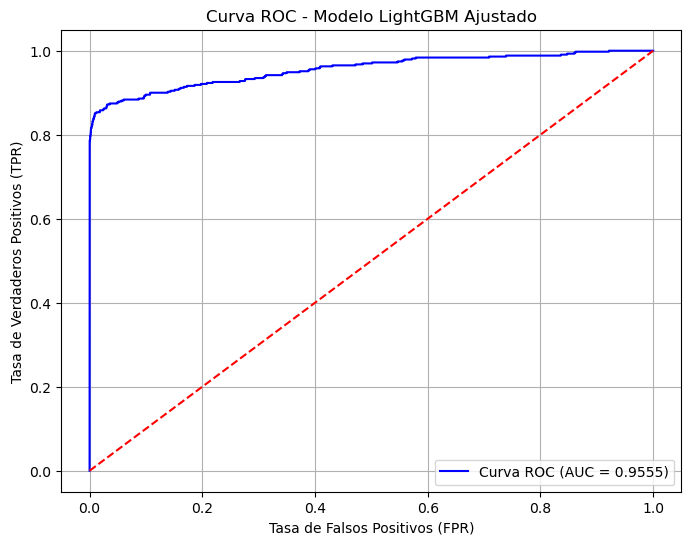

In [118]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calcular las tasas TPR y FPR para la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_best_lgb)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {best_auc_lgb:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Modelo LightGBM Ajustado')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [108]:
feature_importances_lgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_lgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Importancia de características en LightGBM ajustado:")
print(feature_importances_lgb)


Importancia de características en LightGBM ajustado:
                  Feature  Importance
4           Tool_wear_min        4485
2    Rotational_speed_rpm        4073
0       Air_temperature_K        3671
3               Torque_Nm        3618
1   Process_temperature_K        3189
10                 Type_L         395
11                 Type_M         325
6                     HDF         211
12            Zona_Riesgo         189
7                     PWF         156
5                     TWF         134
9                     RNF         131
8                     OSF         123


In [115]:
# Obtener las probabilidades de cada modelo
y_pred_prob_rf = best_random_forest.predict_proba(X_test)[:, 1]
y_pred_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
y_pred_prob_lgb = best_lgb_model.predict_proba(X_test)[:, 1]

# Calcular el promedio de las probabilidades
y_pred_prob_ensemble = (y_pred_prob_rf + y_pred_prob_xgb + y_pred_prob_lgb) / 3

# Calcular el AUC-ROC del modelo ensemble
auc_ensemble = roc_auc_score(y_test, y_pred_prob_ensemble)
print(f"AUC-ROC del modelo ensemble (promedio simple): {auc_ensemble:.4f}")


AUC-ROC del modelo ensemble (promedio simple): 0.9586


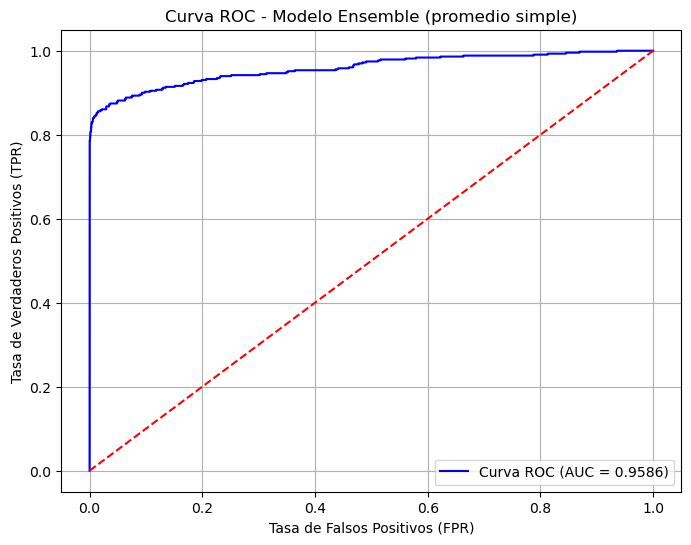

In [120]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calcular las tasas TPR y FPR para la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_ensemble)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {auc_ensemble:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Modelo Ensemble (promedio simple)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [109]:
# Obtener las probabilidades de cada modelo
# Obtener las probabilidades de cada modelo

y_pred_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
y_pred_prob_lgb = best_lgb_model.predict_proba(X_test)[:, 1]


# Calcular el promedio de las probabilidades
y_pred_prob_ensemble = (y_pred_prob_xgb  + y_pred_prob_lgb) / 2

# Calcular el AUC-ROC del modelo ensemble
auc_ensemble = roc_auc_score(y_test, y_pred_prob_ensemble)
print(f"AUC-ROC del modelo ensemble (promedio simple): {auc_ensemble:.4f}")

AUC-ROC del modelo ensemble (promedio simple): 0.9556


In [116]:
from sklearn.ensemble import VotingClassifier

# Crear el ensemble de votación con los mejores modelos
voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_random_forest),
        ('xgb', best_xgb_model),
        ('lgb', best_lgb_model)
    ],
    voting='soft'  # 'soft' para usar las probabilidades, 'hard' para votación por clase
)

# Entrenar el modelo ensemble en los datos de entrenamiento
voting_clf.fit(X_train, y_train)

# Predecir las probabilidades en el conjunto de prueba
y_pred_prob_voting = voting_clf.predict_proba(X_test)[:, 1]

# Calcular el AUC-ROC del modelo ensemble de votación
auc_voting = roc_auc_score(y_test, y_pred_prob_voting)
print(f"AUC-ROC del modelo ensemble (votación): {auc_voting:.4f}")


C:\Users\soler\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:33:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 1718, number of negative: 107425
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 946
[LightGBM] [Info] Number of data points in the train set: 109143, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015741 -> initscore=-4.135632
[LightGBM] [Info] Start training from score -4.135632
AUC-ROC del modelo ensemble (votación): 0.9586


In [117]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Crear el ensemble stacking con los mejores modelos
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', best_random_forest),
        ('xgb', xgb_model_selected),
        ('lgb', best_lgb_model)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5  # Validación cruzada dentro del meta-modelo
)

# Entrenar el modelo ensemble de stacking en los datos de entrenamiento
stacking_clf.fit(X_train, y_train)

# Predecir las probabilidades en el conjunto de prueba
y_pred_prob_stacking = stacking_clf.predict_proba(X_test)[:, 1]

# Calcular el AUC-ROC del modelo ensemble de stacking
auc_stacking = roc_auc_score(y_test, y_pred_prob_stacking)
print(f"AUC-ROC del modelo ensemble (stacking): {auc_stacking:.4f}")


C:\Users\soler\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:35:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 1718, number of negative: 107425
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005484 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 946
[LightGBM] [Info] Number of data points in the train set: 109143, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015741 -> initscore=-4.135632
[LightGBM] [Info] Start training from score -4.135632


C:\Users\soler\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:40:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\soler\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:40:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\soler\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:40:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\soler\anaconda3\Lib\site-packages\

[LightGBM] [Info] Number of positive: 1374, number of negative: 85940
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 946
[LightGBM] [Info] Number of data points in the train set: 87314, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015736 -> initscore=-4.135923
[LightGBM] [Info] Start training from score -4.135923
[LightGBM] [Info] Number of positive: 1374, number of negative: 85940
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 87314, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015736 -> initscore=-4.135923
[LightGBM] [Info] Start training from score -4.135923
[LightGBM] [Info

In [ ]:
Importancia de características en XGBoost:
                  Feature  Importance
6                     HDF    0.435973
8                     OSF    0.260585
7                     PWF    0.127858
5                     TWF    0.107746
12         Anomalia_OCSVM    0.030672
2    Rotational_speed_rpm    0.007543
3               Torque_Nm    0.005778
4           Tool_wear_min    0.004703
0       Air_temperature_K    0.004348
1   Process_temperature_K    0.003794
10                 Type_L    0.003755
9                     RNF    0.003672
11                 Type_M    0.003574

In [64]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Seleccionar solo las características especificadas
selected_features = [
    'HDF', 'OSF', 'TWF', 'Cluster', 'Torque_Nm', 'PWF',
    'Rotational_speed_rpm', 'Tool_wear_min', 'RNF', 'Air_temperature_K', 'Type_L'
]


# Preparar los datos con las características seleccionadas
X_selected = X[selected_features]
y = train_data['Machine failure']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Crear el modelo XGBoost con los mejores hiperparámetros
xgb_model_selected = xgb.XGBClassifier(
    subsample=0.8,
    n_estimators=100,
    min_child_weight=3,
    max_depth=15,
    learning_rate=0.05,
    gamma=0.3,
    colsample_bytree=0.6,
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

# Entrenar el modelo XGBoost con las características seleccionadas
xgb_model_selected.fit(X_train_selected, y_train)

# Predecir las probabilidades en el conjunto de prueba
y_pred_prob_selected = xgb_model_selected.predict_proba(X_test_selected)[:, 1]

# Calcular el AUC-ROC
auc_selected = roc_auc_score(y_test, y_pred_prob_selected)
print(f"AUC-ROC del modelo XGBoost con características seleccionadas: {auc_selected:.4f}")


C:\Users\soler\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AUC-ROC del modelo XGBoost con características seleccionadas: 0.9574


In [ ]:
Importancia de características en XGBoost ajustado:
                  Feature  Importance
6                     HDF    0.315643
8                     OSF    0.206624
12                Cluster    0.195358
5                     TWF    0.113454
7                     PWF    0.110212
9                     RNF    0.042269
3               Torque_Nm    0.004355
2    Rotational_speed_rpm    0.003397
4           Tool_wear_min    0.002380
0       Air_temperature_K    0.001844
1   Process_temperature_K    0.001714
10                 Type_L    0.001568
11                 Type_M    0.001182

In [ ]:
Importancia de características en LightGBM ajustado:
                  Feature  Importance
4           Tool_wear_min        4319
2    Rotational_speed_rpm        4158
3               Torque_Nm        3603
0       Air_temperature_K        3525
1   Process_temperature_K        3160
12                Cluster         612
10                 Type_L         366
11                 Type_M         198
7                     PWF         179
6                     HDF         159
8                     OSF         150
5                     TWF         143
9                     RNF         128

{'subsample': 0.8, 'num_leaves': 70, 'n_estimators': 300, 'min_child_samples': 10, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.6}

In [73]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

selected_features = [
    'Tool_wear_min', 'Rotational_speed_rpm', 'Torque_Nm', 'Air_temperature_K', 'Cluster',
    'Type_L', 'Type_M', 
]

# Preparar los datos con las características seleccionadas
X_selected = X[selected_features]
y = train_data['Machine failure']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Crear el modelo LightGBM con los mejores hiperparámetros
lgb_model_selected = lgb.LGBMClassifier(
    subsample=0.8,
    num_leaves=70,
    n_estimators=300,
    min_child_samples=10,
    max_depth=10,
    learning_rate=0.01,
    colsample_bytree=0.6,
    objective='binary',
    metric='auc',
    random_state=42
)

# Entrenar el modelo LightGBM con las características seleccionadas
lgb_model_selected.fit(X_train_selected, y_train)

# Predecir las probabilidades en el conjunto de prueba
y_pred_prob_selected_lgb = lgb_model_selected.predict_proba(X_test_selected)[:, 1]

# Calcular el AUC-ROC
auc_selected = roc_auc_score(y_test, y_pred_prob_selected_lgb)
print(f"AUC-ROC del modelo LightGBM con características seleccionadas: {auc_selected:.4f}")


[LightGBM] [Info] Number of positive: 1718, number of negative: 107425
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 860
[LightGBM] [Info] Number of data points in the train set: 109143, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015741 -> initscore=-4.135632
[LightGBM] [Info] Start training from score -4.135632
AUC-ROC del modelo LightGBM con características seleccionadas: 0.9568


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Seleccionar solo las características especificadas
selected_features = [
    'HDF', 'OSF', 'TWF', 'Anomalia_OCSVM', 'Torque_Nm',
    'Rotational_speed_rpm', 'Tool_wear_min', 'Air_temperature_K', 'Process_temperature_K'
]

# Preparar los datos con las características seleccionadas
X_selected = X[selected_features]
y = train_data['Machine failure']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Crear el modelo Random Forest con los mejores hiperparámetros
rf_model_selected = RandomForestClassifier(
    n_estimators=500,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features='log2',
    max_depth=40,
    random_state=42
)

# Entrenar el modelo Random Forest con las características seleccionadas
rf_model_selected.fit(X_train_selected, y_train)

# Predecir las probabilidades en el conjunto de prueba
y_pred_prob_selected_rf = rf_model_selected.predict_proba(X_test_selected)[:, 1]

# Calcular el AUC-ROC
auc_selected = roc_auc_score(y_test, y_pred_prob_selected)
print(f"AUC-ROC del modelo Random Forest con características seleccionadas: {auc_selected:.4f}")


In [ ]:

# Obtener las probabilidades de cada modelo en test_data
y_pred_prob_rf_test = best_random_forest.predict_proba(X_test_kaggle)[:, 1]
y_pred_prob_xgb_test = best_xgb_model.predict_proba(X_test_kaggle)[:, 1]
y_pred_prob_lgb_test = best_lgb_model.predict_proba(X_test_kaggle)[:, 1]

# Calcular el promedio de las probabilidades para el modelo ensemble
y_pred_prob_ensemble_test = (y_pred_prob_rf_test + y_pred_prob_xgb_test + y_pred_prob_lgb_test) / 3

# Crear el DataFrame de resultados en el formato solicitado
submission_df = pd.DataFrame({
    'id': test_data['id'],  # Suponiendo que la columna de IDs en test_data es 'id'
    'Machine failure': y_pred_prob_ensemble_test
})

# Guardar los resultados en un archivo CSV
submission_df.to_csv('submission.csv', index=False)


In [143]:
X_test_kaggle = test_data[['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF', 'Type_L', 'Type_M',
       'Zona_Riesgo']]

In [145]:
# Limpiar nombres de las características para que sean válidos en XGBoost
X_test_kaggle.columns = X.columns.str.replace('[', '').str.replace(']', '').str.replace('<', '').str.replace('>', '').str.replace(' ', '_')

# Verificar los nombres de las características
print(X_test_kaggle.columns)

Index(['Air_temperature_K', 'Process_temperature_K', 'Rotational_speed_rpm',
       'Torque_Nm', 'Tool_wear_min', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
       'Type_L', 'Type_M', 'Zona_Riesgo'],
      dtype='object')


In [147]:
test_data = pd.read_csv('test.csv')

In [148]:
import pandas as pd

# Obtener las probabilidades de cada modelo en test_data
y_pred_prob_rf_test = best_random_forest.predict_proba(X_test_kaggle)[:, 1]
y_pred_prob_xgb_test = best_xgb_model.predict_proba(X_test_kaggle)[:, 1]
y_pred_prob_lgb_test = best_lgb_model.predict_proba(X_test_kaggle)[:, 1]

# Calcular el promedio de las probabilidades para el modelo ensemble
y_pred_prob_ensemble_test = (y_pred_prob_rf_test + y_pred_prob_xgb_test + y_pred_prob_lgb_test) / 3

# Crear el DataFrame de resultados en el formato solicitado
submission_df = pd.DataFrame({
    'id': test_data['id'],  # Suponiendo que la columna de IDs en test_data es 'id'
    'Machine failure': y_pred_prob_ensemble_test
})

# Guardar los resultados en un archivo CSV
submission_df.to_csv('submission.csv', index=False)


In [163]:
submission_df[submission_df['Machine failure']>0.92].count()[0]/submission_df.count()[0]*100

1.0686720759944586